In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from scipy.stats import ttest_ind

In [2]:
data = pd.read_excel('/Users/elorm/Documents/Repos/Datasets/data.xlsx')
print(data.head())

  foreignworker               status  \
0           yes             < 0 Euro   
1           yes           < 200 Euro   
2           yes  no checking account   
3           yes             < 0 Euro   
4           yes             < 0 Euro   

                              credithistory              purpose  \
0                         critical account/     radio/television   
1  existing credits paid back duly till now     radio/television   
2                         critical account/            education   
3  existing credits paid back duly till now  furniture/equipment   
4           delay in paying off in the past            car (new)   

                       savings     employmentsince otherdebtors  \
0  unknown/ no savings account       .. >= 7 years         none   
1               ... < 100 Euro  1 <= ... < 4 years         none   
2               ... < 100 Euro  4 <= ... < 7 years         none   
3               ... < 100 Euro  4 <= ... < 7 years    guarantor   
4              

In [3]:
data['phone']

0      yes, registered under the customers name
1                                          none
2                                          none
3                                          none
4                                          none
                         ...                   
983                                        none
984    yes, registered under the customers name
985                                        none
986    yes, registered under the customers name
987                                        none
Name: phone, Length: 988, dtype: object

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 988 entries, 0 to 987
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   foreignworker             988 non-null    object 
 1   status                    988 non-null    object 
 2   credithistory             988 non-null    object 
 3   purpose                   988 non-null    object 
 4   savings                   988 non-null    object 
 5   employmentsince           988 non-null    object 
 6   otherdebtors              988 non-null    object 
 7   property                  988 non-null    object 
 8   otherinstallments         988 non-null    object 
 9   housing                   988 non-null    object 
 10  job                       988 non-null    object 
 11  phone                     988 non-null    object 
 12  duration                  988 non-null    int64  
 13  creditamount              988 non-null    int64  
 14  installmen

### Exploratory Data Analysis
#### Applicant Ages

In [5]:
ages = data['age']

In [6]:
mean_age = np.mean(ages)
min_age = np.min(ages)
max_age = np.max(ages)
median_age = np.median(ages)

print('The the average age of loan applicants is: ' + str(round(mean_age)) + ' years')
print('The the minimum age of loan applicants is: ' + str(min_age) + ' years')
print('The the maximum age of loan applicants is: ' + str(max_age) + ' years')
print('The the median age of loan applicants is: ' + str(median_age) + ' years')

The the average age of loan applicants is: 35 years
The the minimum age of loan applicants is: 19 years
The the maximum age of loan applicants is: 75 years
The the median age of loan applicants is: 33.0 years


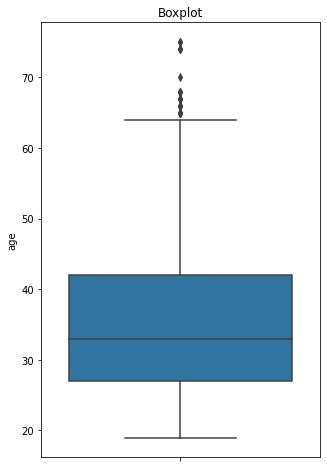

In [7]:
#Boxplots to find outliers
plt.figure(figsize = (5, 8))
sns.boxplot(y = ages)
plt.title('Boxplot')
plt.show()

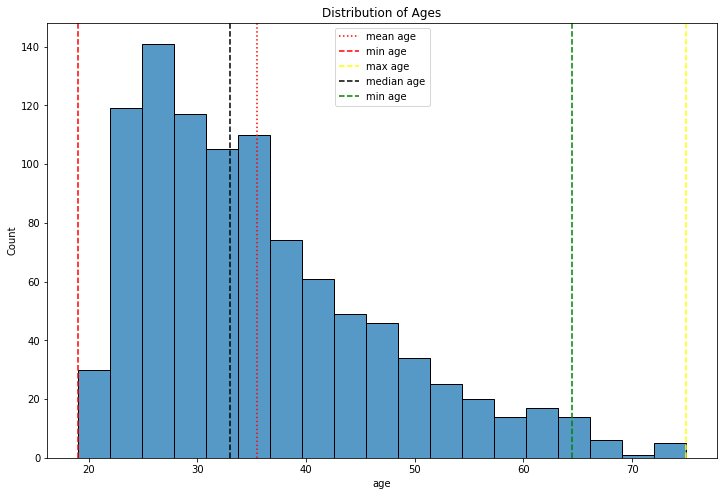

In [8]:
#Finding upper limit
from scipy.stats import iqr
interquartile_range = iqr(ages)
third_quartile = np.quantile(ages, 0.75)
upper_extreme = third_quartile + (1.5 * interquartile_range)


#Plotting the histogram
bins = round(np.sqrt(len(ages)))
plt.figure(figsize = (12, 8))
sns.histplot(ages)
plt.title('Distribution of Ages')
plt.axvline(mean_age, linestyle = 'dotted', color = 'red', label = 'mean age')
plt.axvline(min_age, linestyle = 'dashed', color = 'red', label = 'min age')
plt.axvline(max_age, linestyle = 'dashed', color = 'yellow', label = 'max age')
plt.axvline(median_age, linestyle = 'dashed', color = 'black', label = 'median age')
plt.axvline(upper_extreme, linestyle = 'dashed', color = 'green', label = 'min age')
plt.legend()
plt.show()

In [9]:
data.columns

Index(['foreignworker', 'status', 'credithistory', 'purpose', 'savings',
       'employmentsince', 'otherdebtors', 'property', 'otherinstallments',
       'housing', 'job', 'phone', 'duration', 'creditamount',
       'installmentrate', 'residencesince', 'age', 'numberofexsistingcredits',
       'numberofliablepeople', 'gender', 'creditworthy',
       'creditamout_per_month'],
      dtype='object')

In [10]:
#Making groups of applicants using their ages
labels = ['Young', 'Middle Age', 'Old Age', 'Very Old']
bins = [18, 40, 60, 70, 80]

data['agegroup'] = pd.cut(data['age'], bins = bins, labels = labels)
data.head(1)

,foreignworker,status,credithistory,purpose,savings,employmentsince,otherdebtors,property,otherinstallments,housing,...,creditamount,installmentrate,residencesince,age,numberofexsistingcredits,numberofliablepeople,gender,creditworthy,creditamout_per_month,agegroup
0,yes,< 0 Euro,critical account/,radio/television,unknown/ no savings account,.. >= 7 years,none,real estate,none,own,...,1169,4,4,67,2,1,male,Worthy,194.833333,Old Age


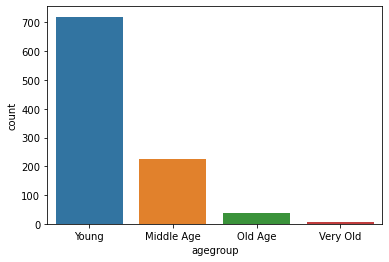

In [11]:
#Counts in age group
sns.countplot(x = 'agegroup', data = data)
plt.show()

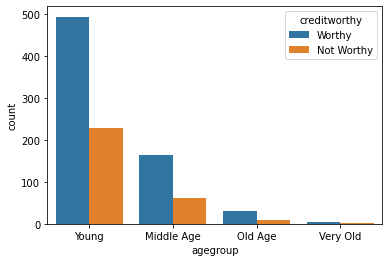

In [12]:
sns.countplot(x = 'agegroup', hue = 'creditworthy', data = data)
plt.show()

#### Applicant Gender

In [13]:
#Number of males and females in the data
num_male_female = data['gender'].value_counts()
print(num_male_female)

male      683
female    305
Name: gender, dtype: int64


In [14]:
perc_male_female = data['gender'].value_counts(normalize = True)
print(perc_male_female)

male      0.691296
female    0.308704
Name: gender, dtype: float64


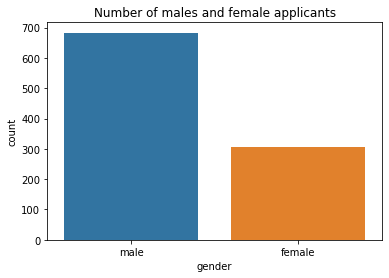

In [15]:
#Plotting the numbers
sns.countplot(x = 'gender', data = data)
plt.title('Number of males and female applicants')
plt.show()

In [16]:
#Number of males and females based on worthiness
male_female_worthiness = pd.crosstab(data['gender'], data['creditworthy'])
print(male_female_worthiness)

creditworthy  Not Worthy  Worthy
gender                          
female               107     198
male                 190     493


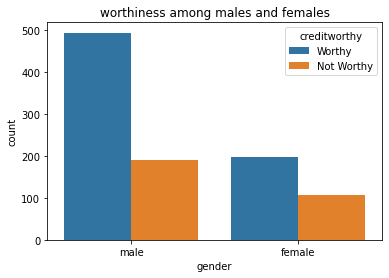

In [17]:
#Plotting the worthiness among males and females
sns.countplot(x = data['gender'], hue = data['creditworthy'])
plt.title('worthiness among males and females')
plt.show()

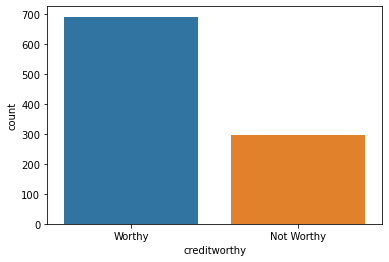

In [18]:
#Number of worthy and unworthy applicants
sns.countplot(x = data['creditworthy'])
plt.show()

In [19]:
data.columns

Index(['foreignworker', 'status', 'credithistory', 'purpose', 'savings',
       'employmentsince', 'otherdebtors', 'property', 'otherinstallments',
       'housing', 'job', 'phone', 'duration', 'creditamount',
       'installmentrate', 'residencesince', 'age', 'numberofexsistingcredits',
       'numberofliablepeople', 'gender', 'creditworthy',
       'creditamout_per_month', 'agegroup'],
      dtype='object')

#### Application Purpose

In [20]:
data['purpose'].unique()

array(['radio/television', 'education', 'furniture/equipment',
       'car (new)', 'car (used)', 'business', 'domestic appliances',
       'repairs', 'others', 'retraining'], dtype=object)

In [21]:
data['purpose'].nunique()

10

In [22]:
purposes = data.purpose.value_counts()
print(purposes)

radio/television       278
car (new)              230
furniture/equipment    180
car (used)             101
business                94
education               50
repairs                 22
domestic appliances     12
others                  12
retraining               9
Name: purpose, dtype: int64


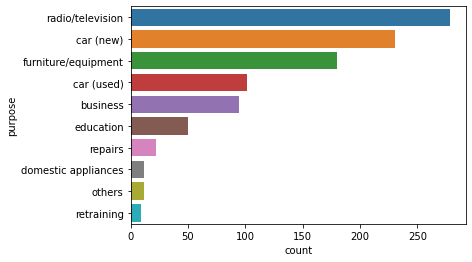

In [23]:
sns.countplot(y = 'purpose', data = data, order = data['purpose'].value_counts().index)
plt.show()

#### Most important features


In [24]:
data.head()

,foreignworker,status,credithistory,purpose,savings,employmentsince,otherdebtors,property,otherinstallments,housing,...,creditamount,installmentrate,residencesince,age,numberofexsistingcredits,numberofliablepeople,gender,creditworthy,creditamout_per_month,agegroup
0,yes,< 0 Euro,critical account/,radio/television,unknown/ no savings account,.. >= 7 years,none,real estate,none,own,...,1169,4,4,67,2,1,male,Worthy,194.833333,Old Age
1,yes,< 200 Euro,existing credits paid back duly till now,radio/television,... < 100 Euro,1 <= ... < 4 years,none,real estate,none,own,...,5951,2,2,22,1,1,female,Not Worthy,123.979167,Young
2,yes,no checking account,critical account/,education,... < 100 Euro,4 <= ... < 7 years,none,real estate,none,own,...,2096,2,3,49,1,2,male,Worthy,174.666667,Middle Age
3,yes,< 0 Euro,existing credits paid back duly till now,furniture/equipment,... < 100 Euro,4 <= ... < 7 years,guarantor,building society savings agreement/ life insur...,none,for free,...,7882,2,4,45,1,2,male,Worthy,187.666667,Middle Age
4,yes,< 0 Euro,delay in paying off in the past,car (new),... < 100 Euro,1 <= ... < 4 years,none,unknown / no property,none,for free,...,4870,3,4,53,2,2,male,Not Worthy,202.916667,Middle Age


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 988 entries, 0 to 987
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   foreignworker             988 non-null    object  
 1   status                    988 non-null    object  
 2   credithistory             988 non-null    object  
 3   purpose                   988 non-null    object  
 4   savings                   988 non-null    object  
 5   employmentsince           988 non-null    object  
 6   otherdebtors              988 non-null    object  
 7   property                  988 non-null    object  
 8   otherinstallments         988 non-null    object  
 9   housing                   988 non-null    object  
 10  job                       988 non-null    object  
 11  phone                     988 non-null    object  
 12  duration                  988 non-null    int64   
 13  creditamount              988 non-null    int64   

In [26]:
categorical_columns = []
for column in data:
    if data[column].dtype == 'object':
        categorical_columns.append(column)
print(categorical_columns)

['foreignworker', 'status', 'credithistory', 'purpose', 'savings', 'employmentsince', 'otherdebtors', 'property', 'otherinstallments', 'housing', 'job', 'phone', 'gender', 'creditworthy']


In [27]:
for item in categorical_columns:
    data[item] = pd.Categorical(data[item])

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 988 entries, 0 to 987
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   foreignworker             988 non-null    category
 1   status                    988 non-null    category
 2   credithistory             988 non-null    category
 3   purpose                   988 non-null    category
 4   savings                   988 non-null    category
 5   employmentsince           988 non-null    category
 6   otherdebtors              988 non-null    category
 7   property                  988 non-null    category
 8   otherinstallments         988 non-null    category
 9   housing                   988 non-null    category
 10  job                       988 non-null    category
 11  phone                     988 non-null    category
 12  duration                  988 non-null    int64   
 13  creditamount              988 non-null    int64   

In [29]:
for item in categorical_columns:
    data[item] = data[item].cat.codes

In [30]:
data.head()

,foreignworker,status,credithistory,purpose,savings,employmentsince,otherdebtors,property,otherinstallments,housing,...,creditamount,installmentrate,residencesince,age,numberofexsistingcredits,numberofliablepeople,gender,creditworthy,creditamout_per_month,agegroup
0,2,0,2,7,4,0,2,2,1,1,...,1169,4,4,67,2,1,1,1,194.833333,Old Age
1,2,1,4,7,1,2,2,2,1,1,...,5951,2,2,22,1,1,0,0,123.979167,Young
2,2,3,2,4,1,3,2,2,1,1,...,2096,2,3,49,1,2,1,1,174.666667,Middle Age
3,2,0,4,5,1,3,1,0,1,0,...,7882,2,4,45,1,2,1,1,187.666667,Middle Age
4,2,0,3,1,1,2,2,3,1,0,...,4870,3,4,53,2,2,1,0,202.916667,Middle Age


In [31]:
data['agegroup'].unique()

['Old Age', 'Young', 'Middle Age', 'Very Old']
Categories (4, object): ['Young' < 'Middle Age' < 'Old Age' < 'Very Old']

In [32]:
data['agegroup'] = pd.Categorical(data['agegroup'])
data['agegroup'] = data['agegroup'].cat.codes

In [33]:
data['agegroup'].unique()

array([2, 0, 1, 3], dtype=int8)

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import scale

In [35]:
model = LogisticRegression()
y = data['creditworthy']

In [36]:
X = data.drop('creditworthy', axis = 1)

In [37]:
#Scaling data
X_scaled = scale(X)

In [38]:
#Model training
model.fit(X_scaled, y)

LogisticRegression()

In [39]:
importance = model.coef_[0]

In [40]:
len(importance)

22

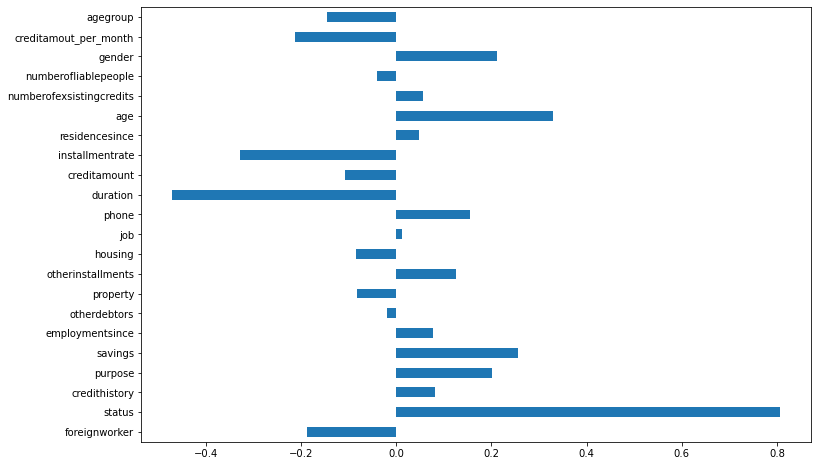

In [41]:
feat_importance = pd.Series(importance, index = X.columns)
plt.figure(figsize = (12, 8))
feat_importance.plot(kind = 'barh')
plt.show()

In [42]:
feat_importance

foreignworker              -0.188208
status                      0.807015
credithistory               0.081965
purpose                     0.202196
savings                     0.256064
employmentsince             0.076509
otherdebtors               -0.020587
property                   -0.082133
otherinstallments           0.126339
housing                    -0.084135
job                         0.012200
phone                       0.155503
duration                   -0.472502
creditamount               -0.107842
installmentrate            -0.327835
residencesince              0.047926
age                         0.330165
numberofexsistingcredits    0.055117
numberofliablepeople       -0.040881
gender                      0.212012
creditamout_per_month      -0.213735
agegroup                   -0.146402
dtype: float64

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.30, random_state = 3)

In [45]:
model.fit(X_train, y_train)

LogisticRegression()

In [46]:
predict = model.predict(X_test)

In [47]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, predict))
print(classification_report(y_test, predict))

[[ 34  55]
 [ 25 183]]
              precision    recall  f1-score   support

           0       0.58      0.38      0.46        89
           1       0.77      0.88      0.82       208

    accuracy                           0.73       297
   macro avg       0.67      0.63      0.64       297
weighted avg       0.71      0.73      0.71       297



In [48]:
data['phone']

0      1
1      0
2      0
3      0
4      0
      ..
983    0
984    1
985    0
986    1
987    0
Name: phone, Length: 988, dtype: int8